In [1]:
# 1. Cargar librerías
import pandas as pd
from pycaret.classification import *


In [2]:
# 2. Cargar datos
df = pd.read_csv('caso1_churn_clientes.csv')

df.head()


,edad,meses_como_cliente,frecuencia_uso,soporte_llamadas,tipo_plan,usa_app_movil,churn
0,50,42,13,2,Estándar,1,0
1,38,24,10,0,Básico,1,0
2,50,17,9,8,Estándar,1,0
3,32,7,10,0,Premium,1,0
4,23,20,9,6,Estándar,1,0


In [3]:
# 3. Configuración del entorno
clf = setup(data=df,
            target='churn',
            session_id=123,
            normalize=True,
            categorical_features=['tipo_plan'])

,Description,Value
0,Session id,123
1,Target,churn
2,Target type,Binary
3,Original data shape,"(300, 7)"
4,Transformed data shape,"(300, 9)"
5,Transformed train set shape,"(210, 9)"
6,Transformed test set shape,"(90, 9)"
7,Numeric features,5
8,Categorical features,1
9,Preprocess,True


In [4]:
# 4. Comparación de modelos para explorar
best_model = compare_models(sort='AUC')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7286,0.6922,0.1133,0.3083,0.1613,0.0777,0.0902,0.0050
lda,Linear Discriminant Analysis,0.7286,0.6922,0.2033,0.3967,0.2620,0.1392,0.1480,0.0050
lr,Logistic Regression,0.7286,0.6846,0.1833,0.4300,0.2453,0.1276,0.1470,0.2590
nb,Naive Bayes,0.7000,0.6753,0.3500,0.4710,0.3839,0.1932,0.2060,0.0050
ada,Ada Boost Classifier,0.6905,0.6517,0.2267,0.3117,0.2530,0.0918,0.0912,0.0090
gbc,Gradient Boosting Classifier,0.6857,0.6300,0.2433,0.3917,0.2659,0.0877,0.1076,0.0090
rf,Random Forest Classifier,0.6952,0.6115,0.1500,0.2733,0.1808,0.0373,0.0376,0.0190
qda,Quadratic Discriminant Analysis,0.6381,0.6021,0.3200,0.2956,0.3012,0.0663,0.0638,0.0060
lightgbm,Light Gradient Boosting Machine,0.6952,0.5986,0.2833,0.3731,0.3056,0.1365,0.1453,0.1040
svm,SVM - Linear Kernel,0.5714,0.5788,0.3433,0.2597,0.2759,-0.0043,-0.0036,0.0040


In [5]:
#Los modelo lineales están funcionando mejor que los árboles para el AUC
#Recall: El de Bayes tiene un mejor filtro para pasar los verdaderos positivos.
#Precisión: El de Bayes tiene un mejor filtro para no pasar los falsos positivos.
#En el caso del Dummy Classifier, solo predice la clase mayoritaria. El accuracy parece alto, pero no detecta nada útil. Evidencia de las clases desbalanceadas.
#F1. Promedio ármonico = 2 * (recall * precision) / (recall + precision)
#Kappa: Se usa para medir la calidad real del modelo, más allá del azar.

In [7]:
# 5. Crear modelo con mejor balance
nb_model = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8095,0.7875,0.4000,0.6667,0.5000,0.3913,0.4108
1,0.6190,0.6875,0.4000,0.2857,0.3333,0.0769,0.0791
2,0.7143,0.7750,0.4000,0.4000,0.4000,0.2125,0.2125
3,0.8095,0.6750,0.4000,0.6667,0.5000,0.3913,0.4108
4,0.8571,0.8500,0.4000,1.0000,0.5714,0.5039,0.5804
5,0.6667,0.6222,0.5000,0.4286,0.4615,0.2222,0.2236
6,0.6667,0.6889,0.1667,0.3333,0.2222,0.0392,0.0430
7,0.6667,0.6111,0.1667,0.3333,0.2222,0.0392,0.0430
8,0.5238,0.5333,0.1667,0.1667,0.1667,-0.1667,-0.1667


In [13]:
# 6. Ajustar hiperparámetros
tuned_nb = tune_model(nb_model,optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8095,0.7875,0.4000,0.6667,0.5000,0.3913,0.4108
1,0.6190,0.6875,0.4000,0.2857,0.3333,0.0769,0.0791
2,0.7143,0.7750,0.4000,0.4000,0.4000,0.2125,0.2125
3,0.8095,0.6750,0.4000,0.6667,0.5000,0.3913,0.4108
4,0.8571,0.8500,0.4000,1.0000,0.5714,0.5039,0.5804
5,0.6667,0.6222,0.5000,0.4286,0.4615,0.2222,0.2236
6,0.6667,0.6889,0.1667,0.3333,0.2222,0.0392,0.0430
7,0.6667,0.6111,0.1667,0.3333,0.2222,0.0392,0.0430
8,0.5238,0.5333,0.1667,0.1667,0.1667,-0.1667,-0.1667


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


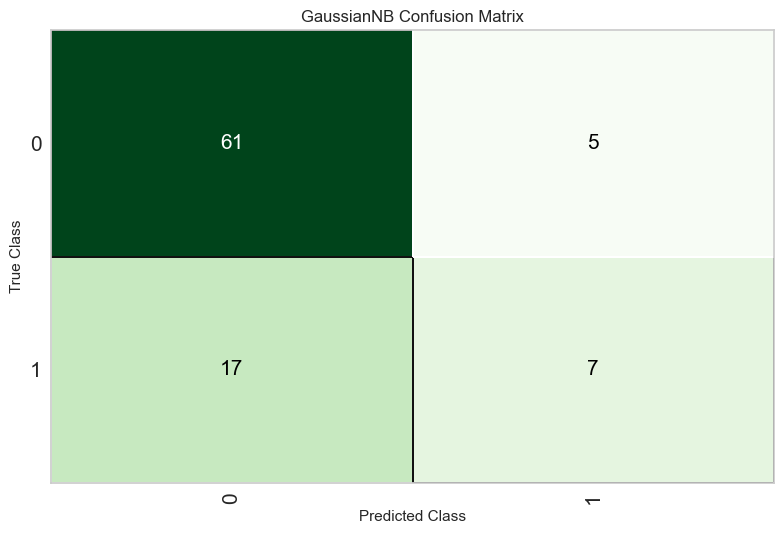

In [15]:
# 7. Interpretación y visualización
plot_model(tuned_nb, plot='confusion_matrix')

In [16]:
# 8. Evaluación interactiva
evaluate_model(tuned_nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [19]:
# 9. Predicciones
predicciones = predict_model(tuned_nb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.7556,0.7235,0.2917,0.5833,0.3889,0.2568,0.2809


In [18]:
# 10. Guardar modelo final para uso futuro
save_model(tuned_nb, 'modelo_churn_final')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['edad', 'meses_como_cliente',
                                              'frecuencia_uso',
                                              'soporte_llamadas',
                                              'usa_app_movil'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  Tra...
                                     tra